In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CHANGE THE STYLE!!
plt.style.use('fivethirtyeight') #https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
sns.set_style("whitegrid")  #https://seaborn.pydata.org/tutorial/aesthetics.html

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


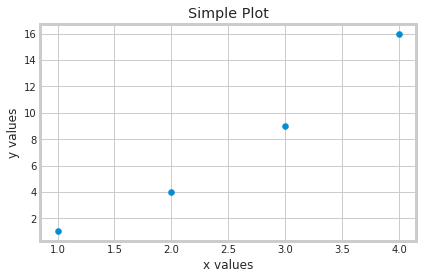

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(x = [1,2,3,4] , y = [1,4,9,16])
ax.set(xlabel = 'x values', ylabel = 'y values', title = 'Simple Plot')
fig.show()

In [ ]:
df_covid = pd.read_csv('/content/drive/My Drive/STEM ENRICH/ALL DATA/Covid_Toronto/COVID19 cases.csv')
df_covid.head()

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,15339,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,15340,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,15341,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,15342,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,15343,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


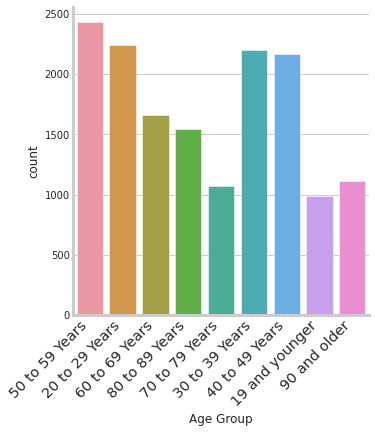

In [ ]:
sns.catplot(data = df_covid, x = 'Age Group', kind = 'count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
) #https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot

plt.show()

Can you plot the other categories and the count? Absolutely. Can you incorporate another cateogry, of course! The answer is here: https://seaborn.pydata.org/tutorial/categorical.html

In [ ]:
df_titanic = sns.load_dataset("titanic")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


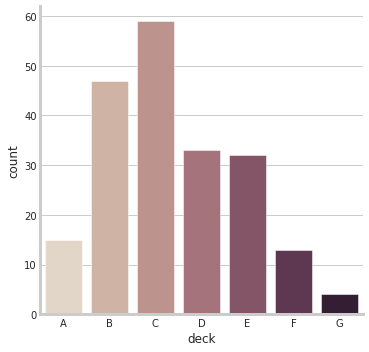

In [ ]:
sns.catplot(data=df_titanic, x="deck", kind="count", palette="ch:.25")
fig = plt.gcf()
fig.savefig('NAMEofFIG.png', dpi = 1000)

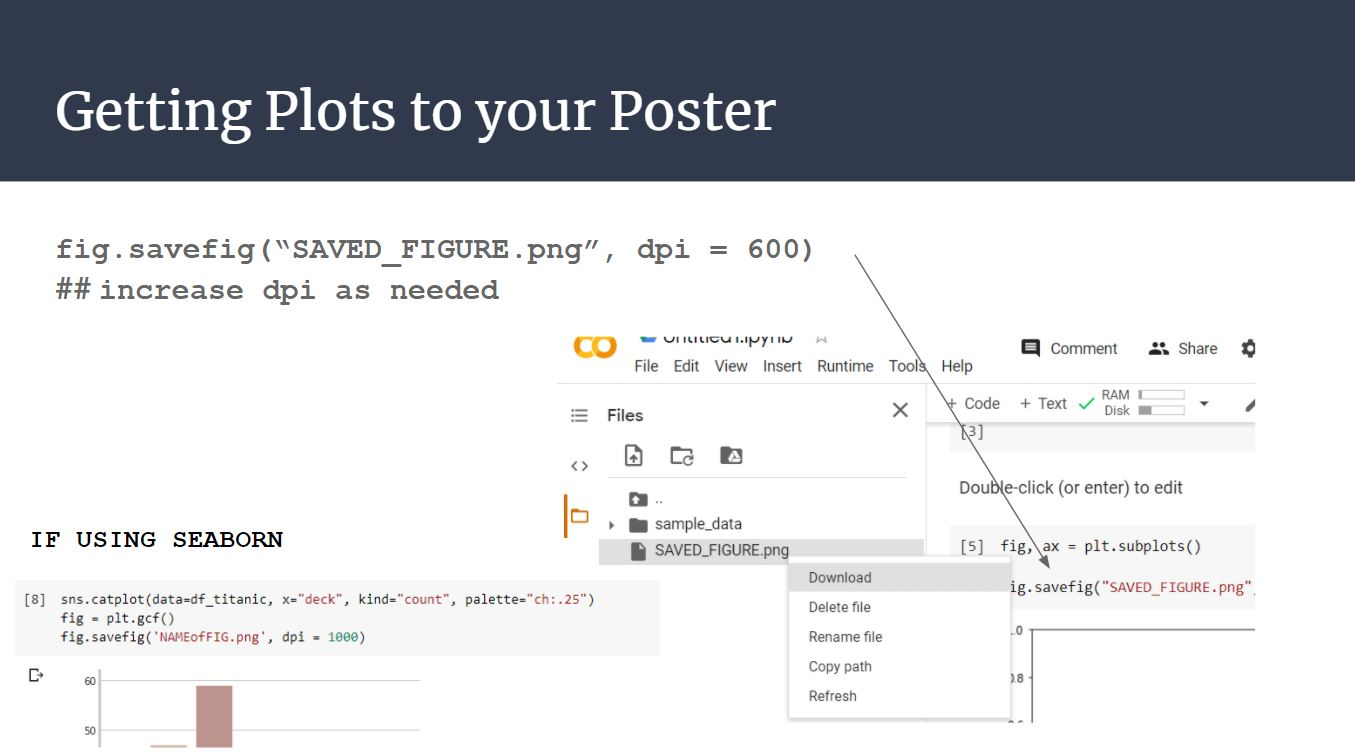

After you run `fig.savefig("filename.png")` wait briefly and it should show up in the files tab of your notebook. 

# Confusion Matrix!!

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_titanic = sns.load_dataset("titanic")
df_titanic['sex'] = df_titanic['sex'].map({'female':1, 'male':0})
df_titanic = df_titanic.drop(columns = ['embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'] )
df_titanic = df_titanic.dropna().copy()

In [ ]:
true_survived = df_titanic['survived']
df_input = df_titanic.drop(columns = ['survived'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_input, true_survived, test_size = 0.20, random_state = 416)
model = RandomForestClassifier(n_estimators=20)
model.fit(X = X_train, y = y_train)
model.predict(X = X_test)
y_predicted = model.predict(X = X_test)
y_predicted

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true = y_test, y_pred = y_predicted)

0.8461538461538461

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true = y_test, y_pred = y_predicted)

0.7894736842105263

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predicted)

array([[76, 10],
       [12, 45]])

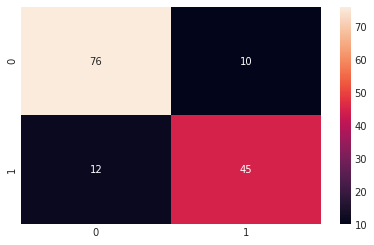

In [ ]:
cf_matrix = confusion_matrix(y_true = y_test, y_pred = y_predicted)
sns.heatmap(cf_matrix, annot=True)

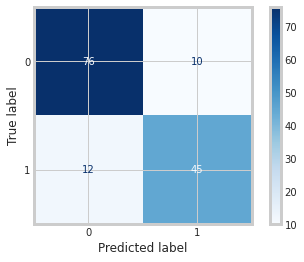

In [ ]:
from sklearn.metrics import plot_confusion_matrix
class_names = [0,1]
disp = plot_confusion_matrix(model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)

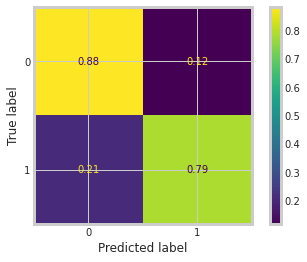

In [ ]:
plot_confusion_matrix(model, X_test, y_test, display_labels=class_names, normalize = 'true')